In [1]:
# installing dependencies
!pip install ultralytics
!pip install easyocr
!pip install -r requirements.txt
!pip install roboflow

# loading our dataset from roboflow with our own api key
from roboflow import Roboflow
rf = Roboflow(api_key="Your API key here!")
project = rf.workspace("mochoye").project("license-plate-detector-ogxxg")
version = project.version(2)
dataset = version.download("yolov8")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.4/756.4 kB 5.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.13, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to License-Plate-Detector-2 in yolov8:: 100%|██████████| 802/802 [00:00<00:00, 3438.21it/s]


In [1]:
from PIL import Image
import ultralytics
import torch
import easyocr
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from ultralytics.utils.plotting import Annotator
import matplotlib.pyplot as plt

In [ ]:
# fine tune yoloV8 with our dataset
model = ultralytics.YOLO("yolov8n.pt")

results = model.train(data= "/content/License-Plate-Detector-2/data.yaml", epochs=100, save=True)

100%|██████████| 6.23M/6.23M [00:00<00:00, 69.6MB/s]

yolo/engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/License-Plate-Detector-2/data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=True, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, retina_masks=False, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, workspace=4, nms=False, lr0=0

In [40]:
# Load a model with best.pt file (saved weights for pretrained model)
model = ultralytics.YOLO('./best.pt')  # load my pretrained YOLOv8n model
# specifying an image to inference on
source = "./test2.jpg"
# predict/inference and save result as cropped image of detected area
result = model.predict(source)


image 1/1 /content/test2.jpg: 384x640 1 LicensePlate, 150.7ms
Speed: 2.3ms preprocess, 150.7ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


In [41]:
# setting up our easyocr reader with english language config
reader = easyocr.Reader(['en'])

In [42]:
# reading the image
img = plt.imread(source)
# looping through result to get coordinates
for r in result:
    annotator = Annotator(img)
    boxes = r.boxes
    for box in boxes:
        # convert box coor from xywh to xyxy
        b=box.xyxy[0]
        c=box.cls
img = annotator.result()
n  = [int(x) for x in b]

In [43]:
# run easyocr on cropped image
ocr = reader.readtext(img[n[1]:n[3], n[0]:n[2]])[0][1]

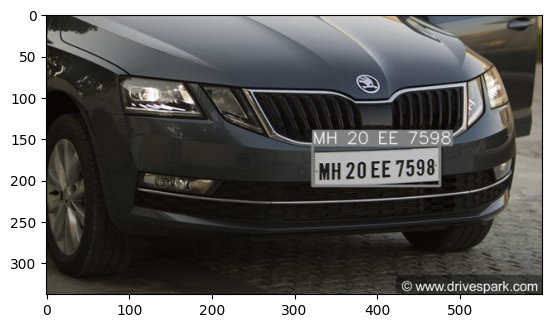

In [44]:
# getting ocr result and write it in bounding box title
for box in boxes:
    annotator.box_label(b, ocr)
img = annotator.result()
plt.imshow(img)

Text(0.5, 1.0, 'MH 20 EE 7598')

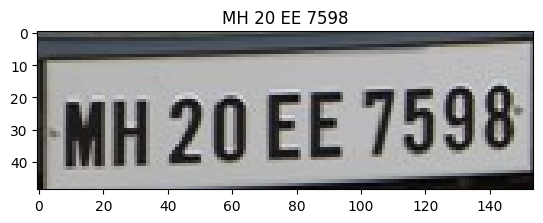

In [45]:
img = plt.imread(source)
plt.imshow(img[n[1]:n[3], n[0]:n[2]])
plt.title(ocr)

In [46]:
def getting_OCR(model_path, source):
    model = ultralytics.YOLO(model_path)
    result = model.predict(source)

    img = plt.imread(source)
    for r in result:
        annotator = Annotator(img)
        boxes = r.boxes
        for box in boxes:
            b=box.xyxy[0]
            c=box.cls
            annotator.box_label(b, "test")
    img = annotator.result()
    n  = [int(x) for x in b]

    ocr = reader.readtext(img[n[1]:n[3], n[0]:n[2]])[0][1]

    for box in boxes:
        annotator.box_label(b, ocr)
    img = annotator.result()
    plt.imshow(img)
    return ocr


image 1/1 /content/License-Plate-Detector-2/valid/images/car-wbs-HR26DA2330_00000_jpeg.rf.40e0feba7fc45dbcdef348e5343a3a55.jpg: 640x640 1 LicensePlate, 311.8ms
Speed: 3.4ms preprocess, 311.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


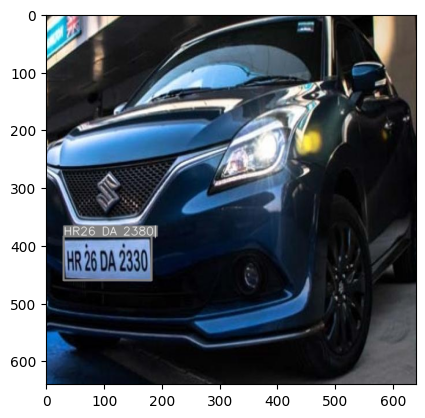

In [50]:
res = getting_OCR("./best.pt", "/content/License-Plate-Detector-2/valid/images/car-wbs-HR26DA2330_00000_jpeg.rf.40e0feba7fc45dbcdef348e5343a3a55.jpg")